## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data
from sklearn.metrics import classification_report
# additional imports for ROC plotting and AUC calculation 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Dataset 1

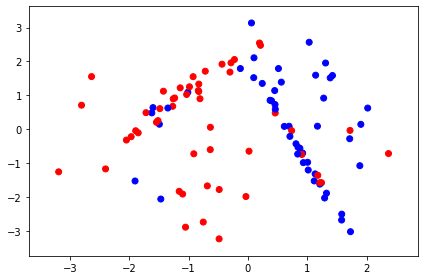

In [3]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [4]:
train_df.head()

x1        x2  y
0  0.455178  0.727672  1
1 -0.303342  1.684185  0
2 -1.100127 -1.914980  0
3  1.129869 -1.319774  1
4  0.396403  0.836826  1

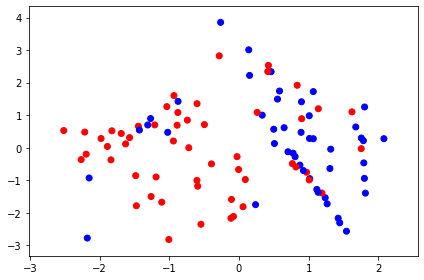

In [5]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [6]:
test_df.head()

x1        x2  y
0 -1.260875 -1.496315  0
1  1.804029  1.253803  1
2 -1.627030  0.118947  0
3 -1.888437  0.040332  0
4  1.140222  1.199631  0

**Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification?**

It's clear that the relationship between predictors and response is not linear, i.e. fitting a straight line that separates positive and negative outcomes will lead to biased model. The data also has high variance and cannot be separated easily using a linear line/plane based on the visualizations. Therefore, a non-linear model would be a better choice for classification.

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [8]:
x_train = train_df[["x1", "x2"]]
y_train = train_df["y"]

x_test = test_df[["x1", "x2"]]
y_test = test_df["y"]

In [9]:
### Fit the classifier on the training data

clf_dt = DecisionTreeClassifier(random_state=26)
### WRITE CODE HERE ###
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=26, splitter='best')

In [10]:
### Make predictions on the training data

### WRITE CODE HERE ###

y_dt_pred_tr = clf_dt.predict(x_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [11]:
### WRITE CODE HERE ###

acc = accuracy_score(y_train, y_dt_pred_tr)
prec = precision_score(y_train, y_dt_pred_tr)
rec = recall_score(y_train, y_dt_pred_tr)

print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

Accuracy 
1.0      
Precision
1.0      
Recall   
1.0      


In [12]:
### Make predictions on the testing data

### WRITE CODE HERE ###

y_dt_pred_ts = clf_dt.predict(x_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [13]:
### WRITE CODE HERE ###

acc = accuracy_score(y_test, y_dt_pred_ts)
prec = precision_score(y_test, y_dt_pred_ts)
rec = recall_score(y_test, y_dt_pred_ts)

print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

Accuracy 
0.69     
Precision
0.682    
Recall   
0.638    


Q. Plot ROC curve and obtain AUC for test predictions

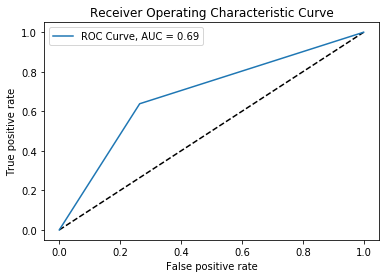

In [14]:
# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = roc_curve(y_test, clf_dt.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, clf_dt.predict_proba(x_test)[:,1])

# Plot the ROC curve by giving appropriate names for title and axes. 

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='best')
plt.show()

**Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.**

We are getting 100% accuracy for training set and 69% for test set. It is clear that the model is overfitting because of bias-variance trade-off, the bias is 0 but the variance is high as can be seen for the lower test accuracy.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
### Fit the classifier on the training data

clf_rf = RandomForestClassifier(random_state=26)

### WRITE CODE HERE ###
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

In [17]:
### Make predictions on the training data


### WRITE CODE HERE ###

y_rf_pred_tr = clf_dt.predict(x_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [18]:
### WRITE CODE HERE ###

acc = accuracy_score(y_train, y_rf_pred_tr)
prec = precision_score(y_train, y_rf_pred_tr)
rec = recall_score(y_train, y_rf_pred_tr)

print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

Accuracy 
1.0      
Precision
1.0      
Recall   
1.0      


In [19]:
### Make predictions on the testing data


### WRITE CODE HERE ###

y_rf_pred_ts = clf_rf.predict(x_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [20]:
### WRITE CODE HERE ###

acc = accuracy_score(y_test, y_rf_pred_ts)
prec = precision_score(y_test, y_rf_pred_ts)
rec = recall_score(y_test, y_rf_pred_ts)

print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

Accuracy 
0.72     
Precision
0.702    
Recall   
0.702    


Q. Plot ROC curve and obtain AUC for the test predictions

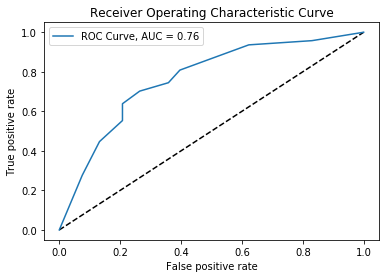

In [21]:

# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, clf_rf.predict_proba(x_test)[:,1])

# Plot the ROC curve by giving appropriate names for title and axes. 

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='best')
plt.show()

In [22]:
f1_score(y_test, clf_rf.predict(x_test))

0.7021276595744681

**Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.**

The Random Forest model also has high variance and almost no bias which can be inferred from the lower accuracy on test data and the high accuracy of model on train data. Therefore we can say that the model is still overfitting a little bit. However, the Random Forest Model is performing better than the Decision Tree model as it has higher test accuracy, precision, recall and higher auc value.

A random forest is a collection of decision trees whose results are aggregated. Random Forests reduce variance by training on different samples of the data. Each random forest tree is learned on a random sample, and at each node, a random set of features are considered for splitting. Therefore, the performance of Random Forest is better than that of a Decision Tree model as the aggregation of many trees is better than the output of the single tree.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [2,3,4,5,6,7,8], # there'no much sense in choosing more having 100 observations, high depth can lead to overfitting
    'max_features': [1, 2], # we just have x1 and x2
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [int(x) for x in range(2,16,2)],
    'n_estimators': [10, 30, 70, 100, 150, 300]
}

In [25]:
rf = RandomForestClassifier(random_state=26)

In [26]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
### Fit the training data

### WRITE CODE HERE ###

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1764 candidates, totalling 5292 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 5292 out of 5292 | elapsed:  3.3min finished
/Users/tigranmargarian/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter wil

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

Q. Display the parameters of the best model.

In [28]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [29]:
grid_search.best_score_

0.8274264705882354

Training set metrics:

Accuracy 
0.84     
Precision
0.837    
Recall   
0.837    

---------

Test set metrics:

Accuracy 
0.73     
Precision
0.679    
Recall   
0.809    


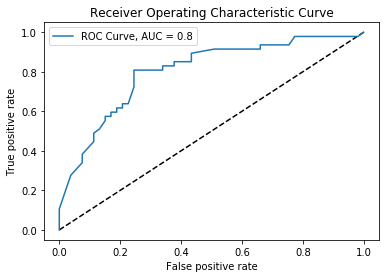


---------

AUC = 0.8


In [30]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.

### WRITE CODE HERE ###

# Training set metrics: 

y_rf_tuned_train = grid_search.predict(x_train)

acc = accuracy_score(y_train, y_rf_tuned_train)
prec = precision_score(y_train, y_rf_tuned_train)
rec = recall_score(y_train, y_rf_tuned_train)

print("Training set metrics:\n")
print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

# Test set metrics & ROC + AUC: 

y_rf_tuned_test = grid_search.predict(x_test)

acc = accuracy_score(y_test, y_rf_tuned_test)
prec = precision_score(y_test, y_rf_tuned_test)
rec = recall_score(y_test, y_rf_tuned_test)
print("\n---------\n")
print("Test set metrics:\n")
print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1])

# Plot the ROC curve + AUC calculation

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='best')
plt.show()

print("\n---------\n")
print(f'AUC = {round(auc,2)}')

**Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters?**

Grid search improved the model performance. Based on calculated scores we achieved improvements on accuracy, precision and AUC, and by just slightly giving up the recall. As we see trainig set results deteriorated, but test set results are better: thus we were able to give up a little bias and improve the variance of the model after parameter tuning. 

Since our GridSearch chooses model based on f1-score it's clear that this metric is much higher for tuned model. 

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [31]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [32]:
y_train = train_df["y"]
x_train = train_df.iloc[:, 0:50]
x_test = test_data

In [33]:
##########################################
### Construct your final random forest model and optimize the hyperparameters using Grid Search ###


# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [2,3,4,5,6,7,8],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [1, 3, 4, 5, 6, 7, 10],
    'min_samples_split': [2, 3, 4, 6, 8, 10],
    'n_estimators': [10, 30, 70, 100, 120, 150, 180]
}

**What can you tell about the range of values to be considered for each of the parameters mentioned above? Explain the reason for choosing the ranges mentioned in your solution.  Also, how does each of these parameters affect overfitting in the model?**

max_depth - Choosing a very high 'max_depth', or leaving it set to default can lead to overfitting because in that case the model can potentialy keep splitting until it models the noise. In this case having 100 observations, there should be no need for more than 6-7 splits since 2^7 = 128. Although the maximum amount of splits is 100 (if we always eliminate one branch of the trees), that's a very extreme case.

max_features - during our ML lecture we learned that usually we choose square root of available features for each tree. However in this case we included another option which is log2 of available features. There's no much difference between these two choises when dealing with 50 features overall. If we choose all the features, we loose the advantage of uncorrelated trees. It can also cause trees to be less diverse and induce overfitting.

min_samples_leaf is the lowest number of samples that should be at the leaf after splitting is over. When we set this parameter high - it prevents model from splitting all the way down to leaves with small numbers of samples. However if we set this parameter too high - it can cause underfitting, because model cannot learn from the data.

min_samples_split specifies the minimum number of samples required to split an internal node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Similar to previous parameter, when we set min_samples_split too high it can stop splitting before entirely learning the dataset relationships and thus - cause underfitting.

n_estimators - number of trees to calculate. Usually we just limited by computational power when choosing this parameter. Since trees are independent, large number of trees doesn't affect overfitting. However, adding a lot of trees can slow down the training process considerably.

In [34]:
rf = RandomForestClassifier(random_state=26)

In [35]:
grid_search2 = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [36]:
### Fit the training data

### WRITE CODE HERE ###

grid_search2.fit(x_train, y_train)

Fitting 3 folds for each of 4116 candidates, totalling 12348 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1257 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 1702 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 2229 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2836 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3525 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4294 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 5145 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6076 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 7089 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8182 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9357 tasks      | 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [37]:
grid_search2.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 30}

In [38]:
grid_search2.best_score_

0.7455384615384617

In [39]:
y_rf_tuned_train = grid_search2.predict(x_train)

acc = accuracy_score(y_train, y_rf_tuned_train)
prec = precision_score(y_train, y_rf_tuned_train)
rec = recall_score(y_train, y_rf_tuned_train)

print("Training set metrics:\n")
print(f'{"Accuracy":<9}')
print(f'{round(acc,3):<9}')

print(f'{"Precision":<9}')
print(f'{round(prec,3):<9}')    

print(f'{"Recall":<9}')
print(f'{round(rec,3):<9}')

Training set metrics:

Accuracy 
0.87     
Precision
0.831    
Recall   
0.942    


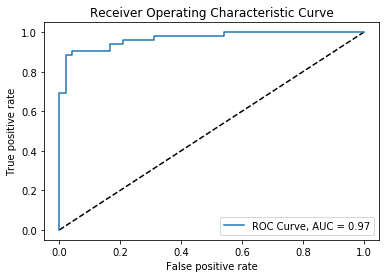


---------

AUC = 0.97


In [40]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = roc_curve(y_train, grid_search2.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train, grid_search2.predict_proba(x_train)[:,1])

# Plot the ROC curve + AUC calculationt. 

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='best')
plt.show()

print("\n---------\n")
print(f'AUC = {round(auc,2)}')

In [41]:
result = pd.DataFrame(grid_search2.predict(x_test), columns=["y"])
result.to_csv('result.csv',index = False)